### Imports

In [10]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### Carregando o dataset

In [11]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

### Explorar os dados

In [12]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
print(identificacoes_treino.min())
print(identificacoes_treino.max())

0
9


### Exibição dos dados

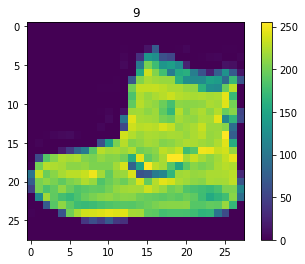

In [13]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                          'Vestido', 'Casaco', 'Sandália', 'Camisa',
                          'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
'''
#visualizar as primeiras imagens
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

Normalização - diminuindo o tamanho para o treino

In [14]:
imagens_treino = imagens_treino/float(255)

# Criando, compilando e treinando o modelo
Camadas (Layers)

In [15]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #Entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #processamento
    keras.layers.Dropout(0.2), #processamento
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) #saida
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 38s 802us/sample - loss: 0.5264 - accuracy: 0.8131 - val_loss: 0.4158 - val_accuracy: 0.8530
Epoch 2/5
48000/48000 [==============================] - 37s 778us/sample - loss: 0.3981 - accuracy: 0.8563 - val_loss: 0.3887 - val_accuracy: 0.8543
Epoch 3/5
48000/48000 [==============================] - 38s 791us/sample - loss: 0.3621 - accuracy: 0.8678 - val_loss: 0.3843 - val_accuracy: 0.8523
Epoch 4/5
48000/48000 [==============================] - 38s 793us/sample - loss: 0.3414 - accuracy: 0.8740 - val_loss: 0.3411 - val_accuracy: 0.8779
Epoch 5/5
48000/48000 [==============================] - 38s 801us/sample - loss: 0.3226 - accuracy: 0.8813 - val_loss: 0.3331 - val_accuracy: 0.8801


# Salvando e Carregando o modelo

In [16]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# Visualizando as acurácias de treino e validação por época

In [17]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Accuracy to epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'validation '])

KeyError: 'acc'

# Visualizando as perdas de treino e validação por época

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss to epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training', 'validation '])

# Testando o modelo e o modelo salvo

In [ ]:
testes = modelo.predict(imagens_teste)
print('Resultado teste: ',np.argmax(testes[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado testes modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])

# Avaliando o modelo

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)